# THE HOUSING MARKET IN MELBOURNE, AUSTRALIA
By [Paul Croome](https://www.linkedin.com/in/pjcroome/), [Rodrigo Rosales Alvarez](https://www.linkedin.com/in/rodrigorosalesalvarez/), and [Viktoriia Shcherbachuk](https://www.linkedin.com/in/viktoriia-shcherbachuk-79aa6512a/)

DATA 601 - Working With Data and Visualization <br>
Professor: Dr. Emma Towlson <br>
University of Calgary <br>
Calgary, Alberta <br>
October 19, 2022

## Introduction
Purchasing and owning a home is an important part of many people’s lives. Diverse research has shown that home ownership is positively related to one’s life satisfaction, via such factors as happiness, self-esteem, confidence, and security (Dietz and Haurin, 2003). However, purchasing a home is also a very difficult decision, as it is one of the most expensive purchases that most people will make in their lifetime and it can lead to significant amounts of debt. In fact, 51% of all wealth in Australian households is in real estate (Australian Council of Social Service, n.d.). In a time when the cost of living is continually rising in many areas of the world, it is increasingly important for people to make informed and economical decisions when purchasing a home. 

Many factors can influence housing prices, including factors which are both internal and external to the house. For example, an external factor that is often negatively related to the price of a house is the distance of the house from its city’s central business district (CBD). That is, the further a house is from the CBD, the lower its price (Gaolu, 2015; Teye, de Haan and Elsinga, 2017). 

In our project, we will examine real estate data from Melbourne, Australia, collected between January 28, 2016 and September 23, 2017, in order to determine how several internal and external factors of housing in Australia’s second most populous city relate to house prices. 

## Guiding Questions
1. Research from several large cities has found a negative relationship between housing prices and the distance of the house from its city’s central business district (CBD) or city center (Gaolu, 2015; Teye, de Haan and Elsinga, 2017). Is there a relationship between housing prices in Melbourne and the distance of a house from Melbourne’s CBD?
2. How do housing prices vary between different regions of Melbourne?
3. How do different features of a house – such as the year it was built, its number of parking spots, and its number of bedrooms – reflect the price?
4. In what month(s) and season(s) of the year are real estate prices highest and lowest?

## Dataset
For this project, we selected the database “Melbourne housing snapshot”, created by Tony Pino, which we found on Kaggle.com. This data was scraped from publicly available results posted every week from Domain.com.au and cleaned by him. This is a well-structured, tabular database with 13580 rows and 21 columns.

You can find more information about this dataset at the following [link](https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot). 

## Project Planning
1. Data Gathering
    1) Import libraries and dataset
    2) Initial data exploration
2. Data Cleaning 
    1) Dropping columns that will not use
    2) Data definition
    3) Null values
3. Data Wrangling
    1) Set the right data type to each column
    2) Feature engineering
4. Data Exploration
    1) Numerical and categorical variables
    2) Independent and dependent variables
    3) Data analysis
5. Linear Regression Model
6. Conclusions

### 1. Data Gathering

*A. Import Libaries and Dataset*

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualizations
import seaborn as sns # visualizations
from scipy.stats import pearsonr # fundamentals algorithms
import math # use math operators
import plotly.express as px # interacting graphing and visualization
import warnings # deal with warnings

# Control the general style of the plots
sns.set_style('whitegrid') 

# Ignore warnings
warnings.filterwarnings('ignore')

# Importing the dataset
# More information about the Dataset can be found here: 
# https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot?resource=download
df = pd.read_csv('../melb_data.csv')

*B. Initial data exploration*

To begin our exploration of this dataset, we used the head() and info() functions. This provided us with a general overview of the variables included in the dataset as well as the types of data included in each column. 

In [2]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

Viewing the Non-Null column in the above info() summary, we saw that there is a significant number of null values in some of our columns of interest -- in particular, 'BuildingArea' and 'YearBuilt'. We used the isna() and sum() functions to summarize the total count of null values in this dataset.

In [4]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

From the results above, we can see that the data is presented in a data frame of size size(1350, 21).

The column with the most NaN values is BuildingArea, with 6450.

To continue our exploration of the data in this data set, we examined the important statistics of price, which is our premier variable of interest.

In [5]:
# Important Statistics for our price variable
df['Price'].describe()[1:].apply(lambda x: '%.2f' % x)

mean    1075684.08
std      639310.72
min       85000.00
25%      650000.00
50%      903000.00
75%     1330000.00
max     9000000.00
Name: Price, dtype: object

### 2. Data Cleaning

Before beginning our data visualizations and analyses, we cleaned the data set by dropping columns that are of no use to us, defining all of the types of data included in the data set, and dropping all of the null values from the data set. 

*A) Dropping columns that will not use*

In [6]:
# We will drop the columns that are not important for our analysis, as we will not  
# need them to answer our guiding questions.
drop_columns = ['Suburb', 'Address', 'Method', 'SellerG', 'Bedroom2', 'CouncilArea', 
               'Lattitude', 'Longtitude', 'Propertycount', 'Postcode', 'Bathroom']
df.drop(drop_columns, axis=1, inplace=True)

*B) Data definition* 
- Type: the type of housing that was sold;
- Regionname: the names of the eight regions in Melbourne;
- Price: a house’s selling price in Australian dollars;
- Date: date that a house was sold;
- Distance: distance of a house from Melbourne's CBD;
- Bathroom: a house’s number of bathrooms;
- Car: a house’s number of parking spots;
- Landsize: size of the land where the property stands;
- BuildingArea: the size of the building that was sold;
- YearBuilt: year when the property was built.

*C) Null values* <br>
Fortunately only 3 columns presented null information. 

After a thorough discussion, we concluded that the best way to procede was to drop all the nulls values as we would still have a significantly large dataset to use for our analyses.

In [7]:
# Dropping null values for each column
df.dropna(subset=['BuildingArea', 'YearBuilt', 'Car'], inplace=True)

# Presenting the cleaned dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6830 entries, 1 to 13579
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rooms         6830 non-null   int64  
 1   Type          6830 non-null   object 
 2   Price         6830 non-null   float64
 3   Date          6830 non-null   object 
 4   Distance      6830 non-null   float64
 5   Car           6830 non-null   float64
 6   Landsize      6830 non-null   float64
 7   BuildingArea  6830 non-null   float64
 8   YearBuilt     6830 non-null   float64
 9   Regionname    6830 non-null   object 
dtypes: float64(6), int64(1), object(3)
memory usage: 587.0+ KB


### 3. Data Wrangling

In our data wrangling phase, we first ensured that all of the columns were of the correct types. Then, we completed several feature engineering steps to ensure that the variables we would be analyzing were appropriately designed for the analyses we would be conducting. 

*A) Set the right data type to each column*

In [8]:
# Transforming Float cols to Int 
ints = ['Car', 'YearBuilt', 'Distance']
for i in ints:
    df[i] = df[i].astype('int32')

# Transforming the Date column to DateTime type
df['Date'] =  pd.to_datetime(df['Date'], format='%d/%m/%Y')

*B) Feature engineering*

In [9]:
# Creating a specific column from each part of the Date column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Mapping house Type column to more user-friendly values
df['Type'] = df['Type'].map({'h':'house', 'u':'unit', 't':'townhouse'})

# Creating a categorical variable for distance
df['DistanceRange'] = '0 - 9.99'
df.loc[(df['Distance'] >= 10) & (df['Distance'] < 20),'DistanceRange'] = '10 - 19.99'
df.loc[(df['Distance'] >= 20) & (df['Distance'] < 30),'DistanceRange'] = '20 - 29.99'  
df.loc[(df['Distance'] >= 30) & (df['Distance'] < 40),'DistanceRange'] = '30 - 39.99'  
df.loc[(df['Distance'] > 40),'DistanceRange'] = '40 or more'

# Creating a Season column
df['Season'] = df['Month'].map({3:'Fall', 4:'Fall', 5:'Fall', 6:'Winter', 7:'Winter', 8:'Winter',
                               9:'Spring', 10:'Spring', 11:'Spring', 12:'Summer', 1:'Summer', 2:'Summer'})

# Removing outliers (observations that are more than 3 standard deviations above or below the mean) for
# the Price, BuildingArea, YearBuilt, and Landsize columns
columns = ['Price', 'BuildingArea', 'YearBuilt', 'Landsize']
for column in columns:
    df = df[np.abs(df[column] - df[column].mean()) <= (3 * df[column].std())]

# Displaying the final data frame
df.head()

,Rooms,Type,Price,Date,Distance,Car,Landsize,BuildingArea,YearBuilt,Regionname,Year,Month,Day,DistanceRange,Season
1,2,house,1035000.0,2016-02-04,2,0,156.0,79.0,1900,Northern Metropolitan,2016,2,4,0 - 9.99,Summer
2,3,house,1465000.0,2017-03-04,2,0,134.0,150.0,1900,Northern Metropolitan,2017,3,4,0 - 9.99,Fall
4,4,house,1600000.0,2016-06-04,2,2,120.0,142.0,2014,Northern Metropolitan,2016,6,4,0 - 9.99,Winter
6,3,house,1876000.0,2016-05-07,2,0,245.0,210.0,1910,Northern Metropolitan,2016,5,7,0 - 9.99,Fall
7,2,house,1636000.0,2016-10-08,2,2,256.0,107.0,1890,Northern Metropolitan,2016,10,8,0 - 9.99,Spring


In [10]:
# Presenting the final data set
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6593 entries, 1 to 13579
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Rooms          6593 non-null   int64         
 1   Type           6593 non-null   object        
 2   Price          6593 non-null   float64       
 3   Date           6593 non-null   datetime64[ns]
 4   Distance       6593 non-null   int32         
 5   Car            6593 non-null   int32         
 6   Landsize       6593 non-null   float64       
 7   BuildingArea   6593 non-null   float64       
 8   YearBuilt      6593 non-null   int32         
 9   Regionname     6593 non-null   object        
 10  Year           6593 non-null   int64         
 11  Month          6593 non-null   int64         
 12  Day            6593 non-null   int64         
 13  DistanceRange  6593 non-null   object        
 14  Season         6593 non-null   object        
dtypes: datetime64[ns](1)

### 4. Data Exploration

*A) Numerical and Categorical Variables*

To explore the cleaned and wrangled data set, we first displayed visualizations of each of the categorical and numerical variables we would be analyzing. 

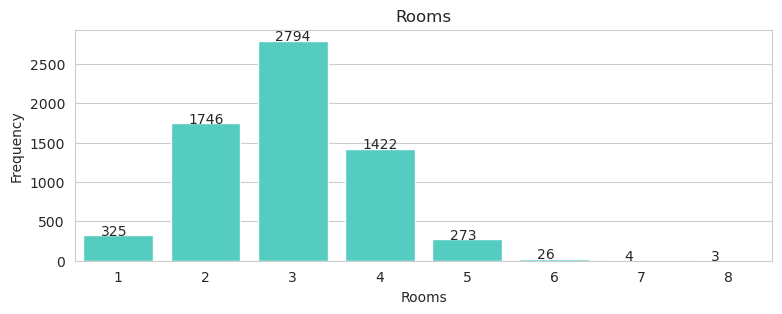

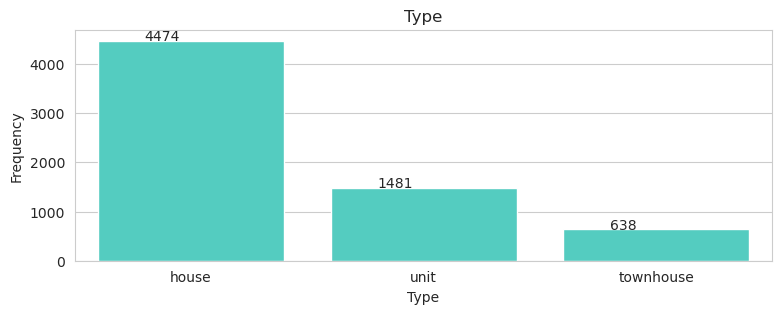

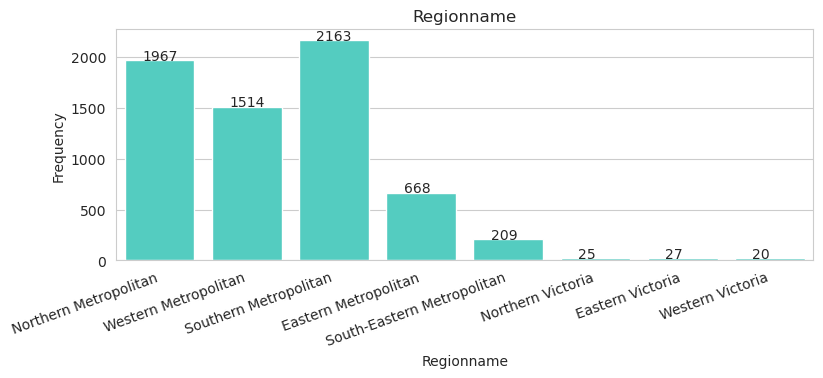

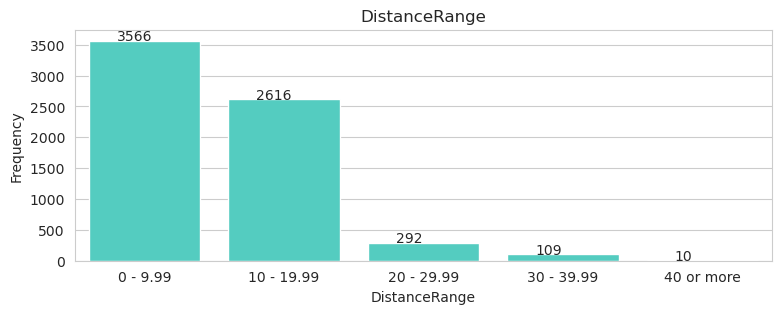

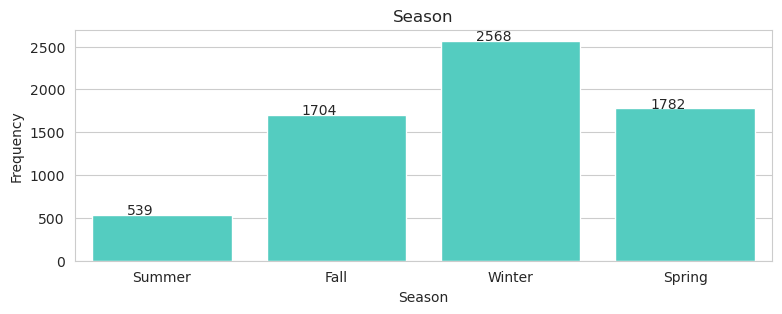

In [11]:
# Plotting each of the categorical variables in a bar chart
categorical_columns = ['Rooms', 'Type', 'Regionname', 'DistanceRange', 'Season']

for i in categorical_columns:
    plt.figure(figsize=(9,3))
    ax = sns.countplot(x=i, data=df, color='turquoise')
    if i == 'Regionname':
        plt.xticks(rotation=20, ha='right', size=10)
    for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+0.5))
    plt.ylabel('Frequency')
    plt.title(i)

In [12]:
# Important statistics of the numerical variables
numerical_columns = ['Price', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']

for i in numerical_columns:
    print(df[i].describe()[1:].apply(lambda x: '%.2f' % x))
    print(' ')

mean    1024871.60
std      540268.77
min      131000.00
25%      626000.00
50%      880000.00
75%     1300000.00
max     3085000.00
Name: Price, dtype: object
 
mean     9.76
std      6.00
min      0.00
25%      6.00
50%      9.00
75%     13.00
max     47.00
Name: Distance, dtype: object
 
mean     420.31
std      351.06
min        0.00
25%      161.00
50%      388.00
75%      627.00
max     3215.00
Name: Landsize, dtype: object
 
mean    136.47
std      64.43
min       0.00
25%      93.00
50%     125.00
75%     168.00
max     399.00
Name: BuildingArea, dtype: object
 
mean    1964.60
std       36.17
min     1856.00
25%     1940.00
50%     1970.00
75%     1999.00
max     2018.00
Name: YearBuilt, dtype: object
 


*B) Independent and dependent variables* <br>

The only dependent variable in our data set is 'Price'. All of the the other variables we have included in our analyses are independent variables, as they can each be logically used to explain (at least in part) the prices of properties in Melbourne.

*C) Data analyses* <br>
In conducting our data analyses, we organized our efforts around answering each of our guiding questions.

**1)** *Research from several large cities has found a negative relationship between housing prices and the distance of the house from its city’s central business district (CBD) or city center (Gaolu, 2015; Teye, de Haan and Elsinga, 2017). Is there a relationship between housing prices in Melbourne and the distance of a house from Melbourne’s CBD?*

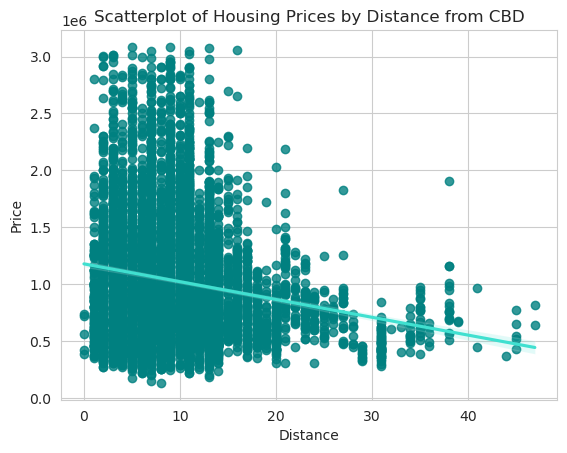

In [13]:
# To analyze the relationship between housing prices and the distance of a house 
# from Melbourne's CBD, we first plotted these variables on a scatterplot and 
# showed a regression line:
sns.regplot(data=df, x='Distance', y='Price', color='teal', line_kws={"color": "turquoise"}).set(title='Scatterplot of Housing Prices by Distance from CBD')
plt.show()

From the plot above, there is evidently a negative correlation between the price of a house and the distance of that house from the CBD. In order to calculate the strength of this relationship, we used the pearnsonr() function, providing us with the Pearson correlation coefficient, r:

In [14]:
pearsonr(x=df['Price'], y=df['Distance'])

PearsonRResult(statistic=-0.17376227735103061, pvalue=7.436526770996808e-46)

Before investigating this relationship further, we viewed the means for each distance range numerically. 

In [15]:
df.groupby('DistanceRange')['Price'].mean().sort_values(ascending=False).apply(lambda x: '%.3f' % x)

DistanceRange
0 - 9.99      1089494.233
10 - 19.99     983514.483
20 - 29.99     776342.192
40 or more     615050.000
30 - 39.99     606657.853
Name: Price, dtype: object

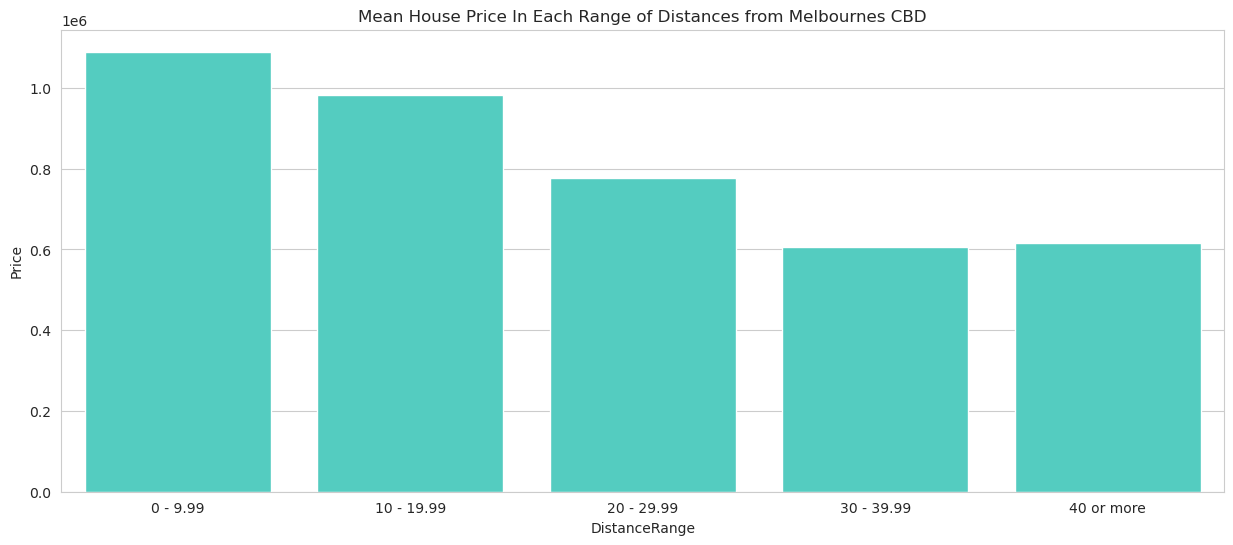

In [16]:
med_prices = df['Price'].groupby(df['DistanceRange']).mean().reset_index()

# Plotting median house prices per distance range:
fig = plt.figure()
fig.set_size_inches(15,6)
sns.barplot(data=med_prices, x='DistanceRange', y='Price', color='turquoise')
plt.title('Mean House Price In Each Range of Distances from Melbournes CBD')
plt.show()

**Conclusions - Q1**

To determine the relationship between housing prices and distances from Melbourne's CBD, we first plotted these variables for each house in our dataset on a scatterplot. In this scatterplot, there is a great deal of variability. Despite this variability, there is a non-zero correlation in these data, as made evident by the linear regression line within the plot. To determine the precise correlation coefficient, we used the pearsonr() function, imported from scipy.stats. From this, we found a weak correlation of about -0.1738. Although this is a weak correlation, it is still statistically significant (as supported by the miniscule p-value attached to this correlation coefficient). Furthermore, when considering real-world data in a field like real estate, where countless confounding factors might exist to impact this correlation (for example, the degree to which public transport is accessible), a relationship of -0.1738 is certainly noteworthy.

To further investigate and visualize this relationship, we examined the mean housing prices by different ranges of distances of a house from Melbourne's CBD. We then visualized this relationship in a bar plot (using seaborn). This graph demonstrates the negative relationship between price and distance, as the height of each bar decreases as the distance range increases, until the final distance range (which rises only slightly from the one before it). 

**2)** *How do house prices vary between different regions of Melbourne?*

In [17]:
# First, we determined the mean house price for each region
df.groupby('Regionname')['Price'].mean().sort_values(ascending=False).apply(lambda x: '%.2f' % x)

Regionname
Southern Metropolitan         1282880.87
Eastern Metropolitan          1091990.40
South-Eastern Metropolitan     887863.17
Northern Metropolitan          869827.63
Western Metropolitan           868626.94
Eastern Victoria               690480.81
Northern Victoria              569440.00
Western Victoria               408150.00
Name: Price, dtype: object

In [18]:
# Next, we calculated the mean distance of houses in each region
df.groupby('Regionname')['Distance'].mean().sort_values(ascending=False).apply(lambda x: '%.2f' % x)

Regionname
Eastern Victoria              33.52
Northern Victoria             32.84
Western Victoria              30.00
South-Eastern Metropolitan    23.99
Eastern Metropolitan          13.64
Western Metropolitan           9.56
Southern Metropolitan          8.44
Northern Metropolitan          7.72
Name: Distance, dtype: object

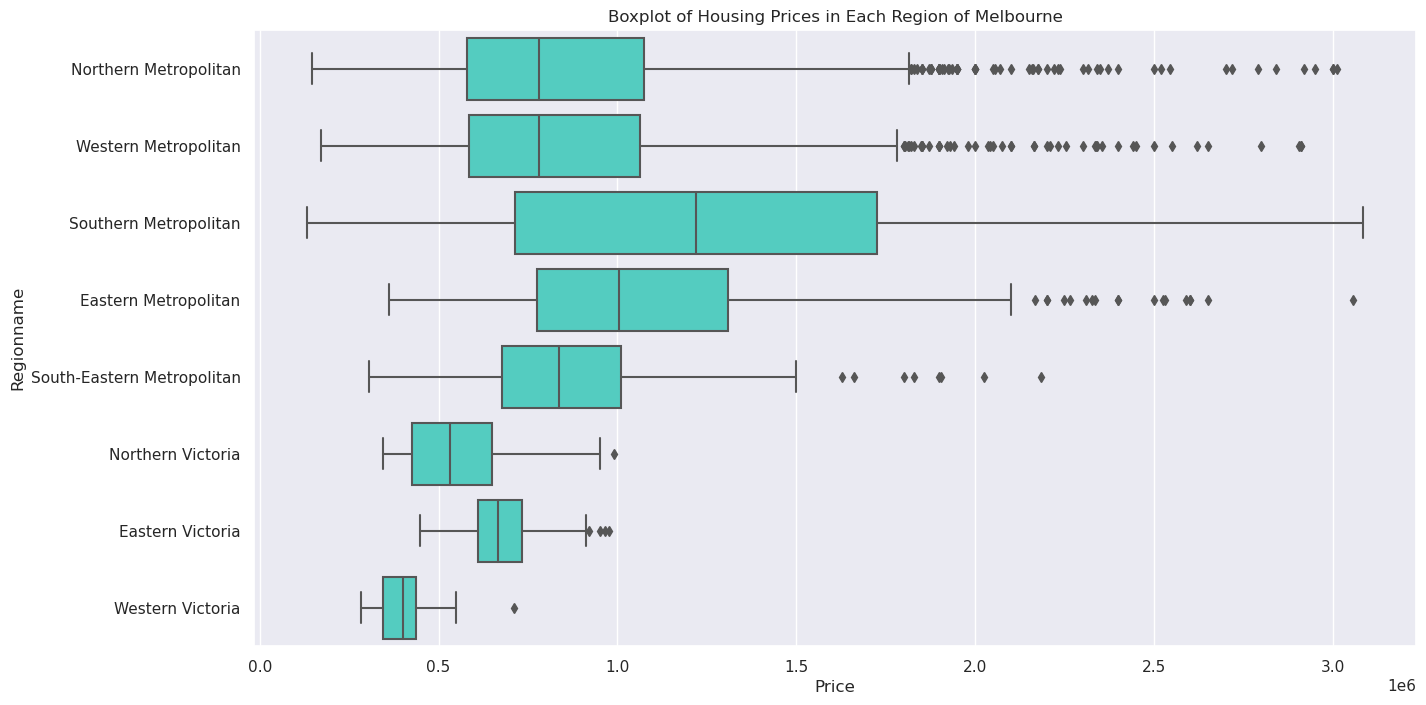

In [19]:
# Displaying a boxplot of housing prices per region name
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(x='Price', y='Regionname', data=df, color='turquoise').set(title='Boxplot of Housing Prices in Each Region of Melbourne')
plt.show()

**Conclusion - Q2**

The boxplot above showed us that the greatest spread in housing prices prevailed in the Southern Metropolitan region, which also had the highest mean (1,282,880.90 AUD) and median (1,220,000.00 AUD) housing prices. Taking into consideration that we removed outliers in this database, we can still see outliers in every region except the Southern Metropolitan.

It is evident that housing prices in Metropolitan areas are significantly higher than in the suburbs (Victorian regions) of Melbourne. Among the suburbs of Melbourne (Western, Northern, and Eastern Victoria), the least expensive properties are found in Western Victoria, while the most expensive proporties are located in Eastern Victoria (with a mean price of 690,480.80 AUD). Interestingly, there is little difference in the mean housing prices of the Northern (868,587.9 AU dollars) and Western Metropolitan (871,419.1 AU dollars) regions of Melbourne. 

**3)** *How do different features of a house – such as the year it was built, its number of parking spots, and its number of bedrooms – reflect the price?*

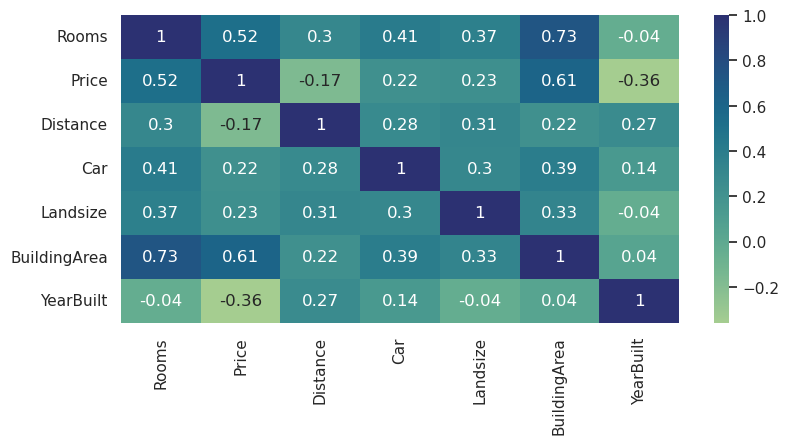

In [20]:
# To obtain an overview of the extent to which each of the numerical variables in our 
# dataset are related to housing prices, we used a heat map to present each of these correlations
f, ax = plt.subplots(figsize=(9, 4))
sns.heatmap(round(df.drop(['Year', 'Month', 'Day'], axis=1).corr(),2), annot=True, cmap='crest')
plt.show()

The heat map above provides useful information regarding the relationships between each of our numerical variables and housing prices. 

Following this, we produced a visualiation to analyze the relationship between one of our categorical variables, the type of house that was sold, and housing prices.

Type
house        1187914.13
townhouse     899019.28
unit          586547.14
Name: Price, dtype: object

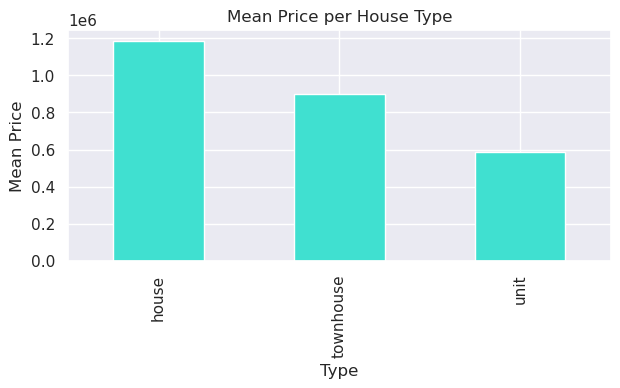

In [21]:
# Plotting mean housing prices for each type of home in a bar graph
bar_type_price = df.groupby('Type')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(7,3))
bar_type_price.plot(kind='bar', color='turquoise')
plt.title('Mean Price per House Type')
plt.ylabel('Mean Price')
display(bar_type_price.apply(lambda x: '%.2f' % x))
plt.show()

From the bar graph above, it is clear that the highest housing prices are found in houses, across our entire data set. Housing prices are significanlty lower among townhouses, and then significantly lower still among units. 

Below, we produced visualizations to further analyze two of the numerical variables that were most strongly correlated with housing price. First, we visualized the mean price of a house according to its number of rooms using a bar graph; then, we visualized the mean price of a house by its total building area using a scatterplot.

Rooms
5    1629869.26
7    1536750.00
6    1489192.31
4    1357421.73
3    1044783.51
8     797333.33
2     733808.73
1     412791.54
Name: Price, dtype: object

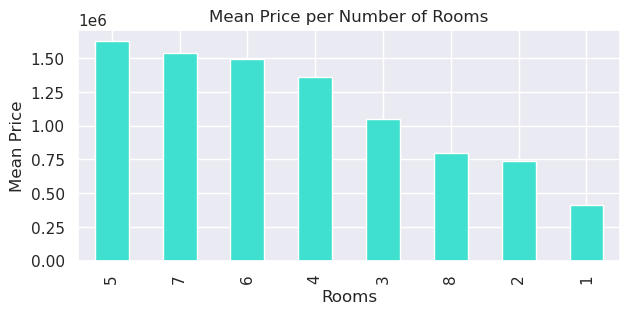

In [22]:
# Plotting mean housing prices for the number of rooms in a home in a bar graph
bar_rooms_house = df.groupby('Rooms')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(7,3))
bar_rooms_house.plot(kind='bar', color='turquoise')
plt.title('Mean Price per Number of Rooms')
plt.ylabel('Mean Price')
display(bar_rooms_house.apply(lambda x: '%.2f' % x))
plt.show()

As seen in the bar graph above, the highest mean housing prices were found among houses with 5 bedrooms, followed by 7 rooms, 6 rooms, and then by progressively fewer rooms. Interestingly, houses with 8 rooms had a mean housing price between that of houses with  only 2 and 3 rooms. 

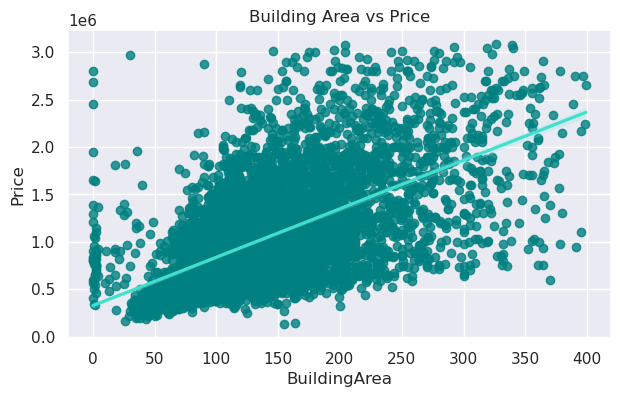

In [23]:
# Constructing a reg plot to display the relationship between Price and Building Area
plt.figure(figsize=(7,4))
sns.regplot(data=df, x="BuildingArea", y="Price", color='teal', line_kws={"color": 'turquoise'})
plt.title('Building Area vs Price')
plt.show()

From the plot above, we can appreciate a positive correlation between the price of a house and the building area. In order to calculate the strength of this relationship, we used the pearnsonr() function, providing us with the Pearson correlation coefficient, r:

In [24]:
pearsonr(x=df['Price'], y=df['BuildingArea'])

PearsonRResult(statistic=0.6095496032509093, pvalue=0.0)

This correlation of roughly r = 0.6095 agrees with the correlation seen in our previously computed heat map of correlations between housing prices and the other variables. 

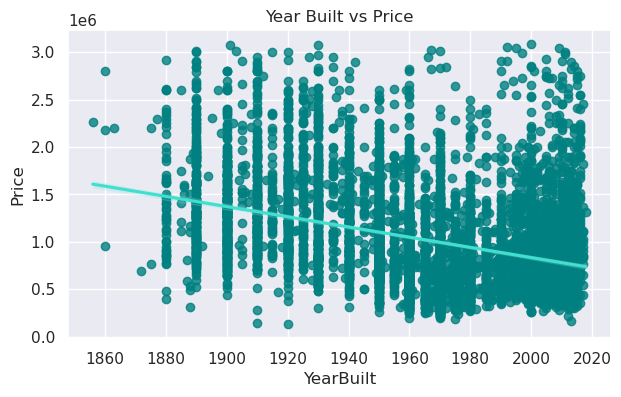

In [25]:
# Constructing another reg plot to visualize the distribution of housing prices and the year
# a house was built
plt.figure(figsize=(7,4))
sns.regplot(data=df, x="YearBuilt", y="Price", color='teal', line_kws={"color": 'turquoise'})
plt.title('Year Built vs Price')
plt.show()

The plot above displays the existance of a negative correlation between the price of a house and the year that the house was built. In order to calculate the strength of this relationship, we once again used the pearnsonr() function to obtain the Pearson correlation coefficient, r:

In [26]:
pearsonr(x=df['Price'], y=df['YearBuilt'])

PearsonRResult(statistic=-0.3600268262213168, pvalue=5.590971220629861e-201)

**Conclusions - Q3** <br>
As previously established, the housing market is a very important matter in today’s economy and in society´s happiness. Thus, knowing how different features of a house relate to the price of the residence is very important. 

To answer our third question, we first made a heat map to see how different attributes of a house could change its price. This heat map displayed the correlation between each independent variable of interest in our data set and our dependent variable of housing prices ('Price'). 

Correlation is a statistical measure that expresses if two variables are linearly related. A value of 1.0 indicates a perfect positive correlation, while a value of -1.0 indicates perfect negative correlation. In our heat map, we can see that 'BuildingArea' has a positive correlation of 0.61 with 'Price', 'YearBuilt' has a negative correlation -0.36 with 'Price', and 'Rooms' has a positive correlation of 0.52 with 'Price'. These three variables are the most strongly correlated variables to Price in our data set. 

Afterwards, we created two regression plots (using seaborn) to visualize the relationship between our Dependent Variable, 'Price', and two of our Independent Variables, 'YearBuilt' and 'BuildingArea'. As we can see in both cases, either of these relationships can be described by a strong correlation. Lastly, we made two bar charts to visualize the average prices for houses according to their number of rooms and the type of the house. In these plots, we can see that housing prices are generally higher for houses with a higher number of rooms (besides houses with 8 rooms), and that houses are in general more expensive than either townhouses or units (which are the least expensive type of housing). 

**4)** *In what month(s) and season(s) of the year are real estate prices highest and lowest?*

In [27]:
# To begin our analysis of this question, we calculated the mean housing price in each season in 
# the dataset so we could determine which seasons had the highest and lowest prices: 
df.groupby('Season')['Price'].mean().sort_values(ascending=False).apply(lambda x: '%.3f' % x)

Season
Spring    1084276.848
Summer    1070125.321
Fall      1031440.876
Winter     969791.396
Name: Price, dtype: object

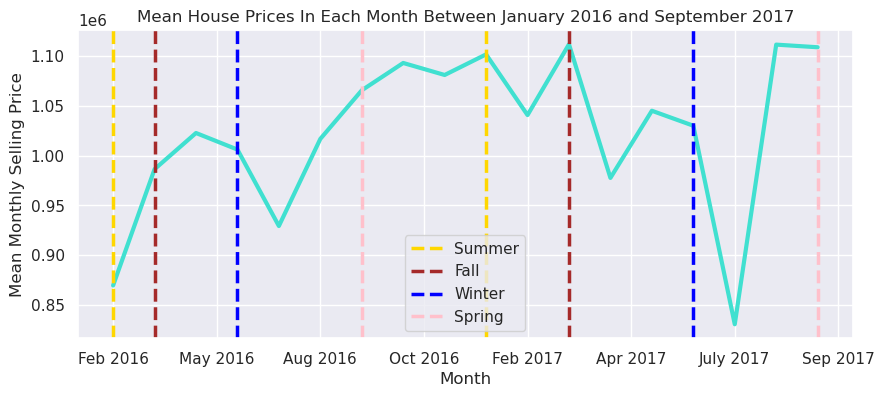

In [28]:
# Next, we used a lineplot to visualize the overall housing price trends 
# over the entire dataset, plotting the mean prices per month:
pricesovertime = df['Price'].groupby([df['Year'], df['Month']]).mean().reset_index()

# Line plot between the years
fig = plt.figure()
fig.set_size_inches(10,4)
p = sns.lineplot(data=pricesovertime['Price'], color='turquoise', linewidth=3.0)
plt.title('Mean House Prices In Each Month Between January 2016 and September 2017')
plt.xlabel('Month')
plt.ylabel('Mean Monthly Selling Price')
xlabels = [0, 'Feb 2016', 'May 2016', 'Aug 2016', 'Oct 2016', 'Feb 2017', 'Apr 2017', 'July 2017', 'Sep 2017']
p.set_xticklabels(xlabels)
plt.axvline(x=0, linewidth=2.5, color='gold', ls='--', label='Summer') # summer
plt.axvline(x=1, linewidth=2.5, color='brown', ls='--', label='Fall') # fall
plt.axvline(x=3, linewidth=2.5, color='blue', ls='--', label='Winter') # winter
plt.axvline(x=6, linewidth=2.5, color='pink', ls='--', label='Spring') # spring
plt.axvline(x=9, linewidth=2.5, color='gold', ls='--') # summer
plt.axvline(x=11, linewidth=2.5, color='brown', ls='--') # fall
plt.axvline(x=14, linewidth=2.5, color='blue', ls='--') # winter
plt.axvline(x=17, linewidth=2.5, color='pink', ls='--') # spring
plt.legend()
plt.show()

The above line plot appears to show a cyclical trend in housing prices: namely, that housing prices rise between winter and spring, peak between late winter and late spring, and eventually decrease again as winter approaches. 

To examine this trend within seasons more generally, and then within the months themselves, 
we used bar graphs to compare the median prices in each of these time delineations below:

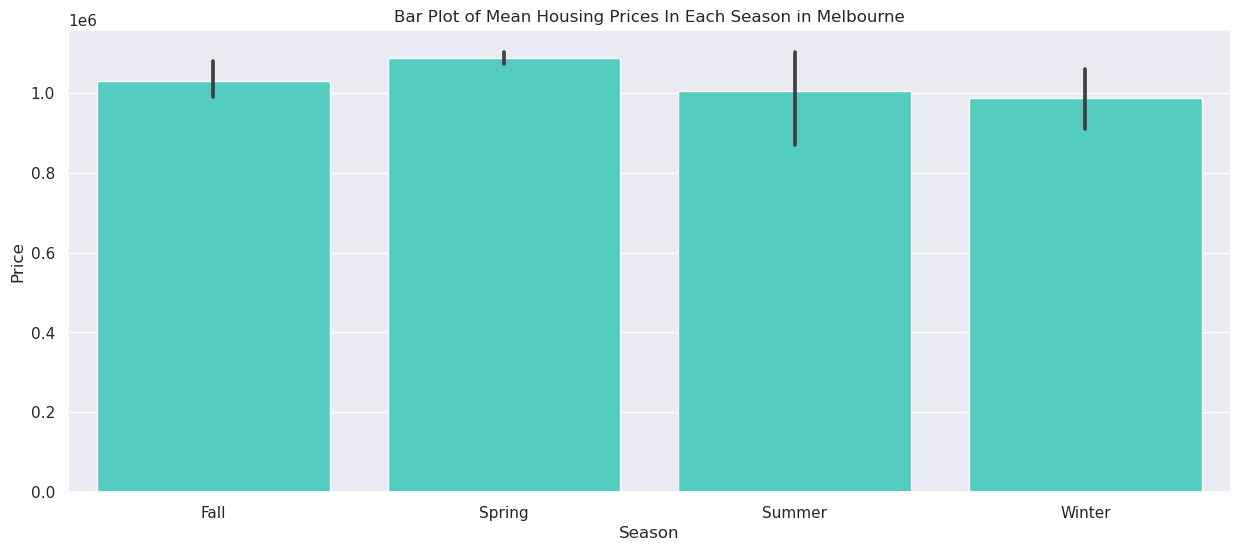

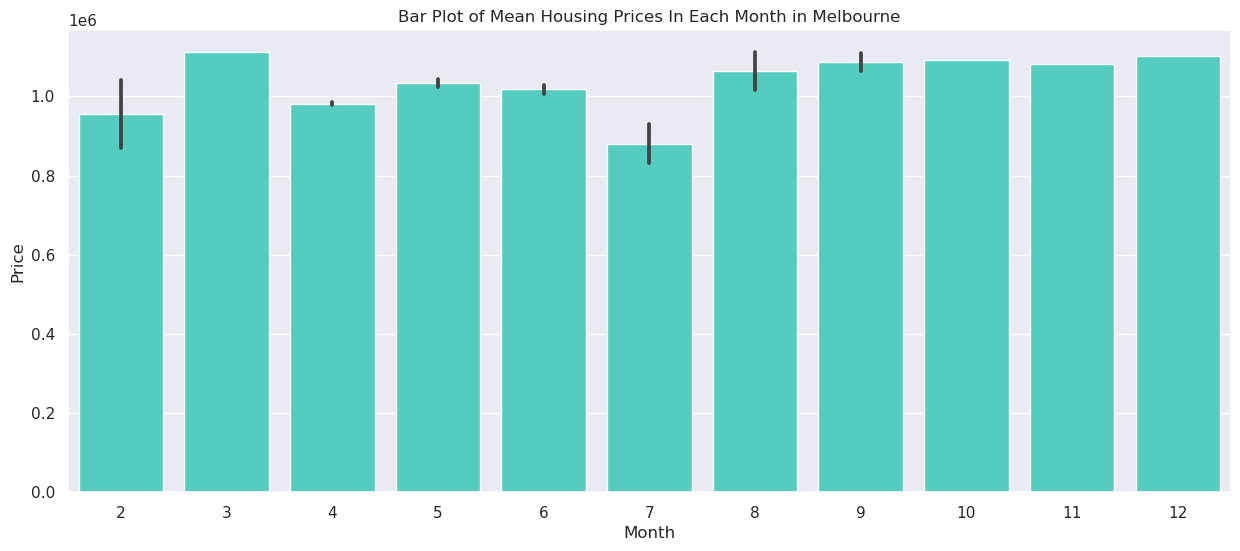

In [29]:
pricesovertime2 = df['Price'].groupby([df['Year'], df['Season'], df['Month']]).mean().reset_index()

fig = plt.figure()
fig.set_size_inches(15,6)
sns.barplot(data=pricesovertime2, x='Season', y='Price', color='turquoise')
plt.title('Bar Plot of Mean Housing Prices In Each Season in Melbourne')
plt.show()


fig = plt.figure()
fig.set_size_inches(15,6)
sns.barplot(data=pricesovertime2, x='Month', y='Price', color='turquoise')
plt.title('Bar Plot of Mean Housing Prices In Each Month in Melbourne')
plt.show()

From the first plot above, it appears that there is a slight difference in median housing prices between the seasons, with Spring seeing the highest prices and the remaining seasons seeing lower prices in comparison.

From the monthly bar plot, we can glean several interesting facts about the housing market in Melbourne as well. For example:
- the month of July (mid-winter) sees the lowest housing prices overall;
- the months of August through December (late-winter through to the beginning of Summer) see the highest median housing prices overall; and
- the months of February through July (late summer to mid-winter) have lower housing prices compared to the other half of the year (with March seeming to be an outlier). 

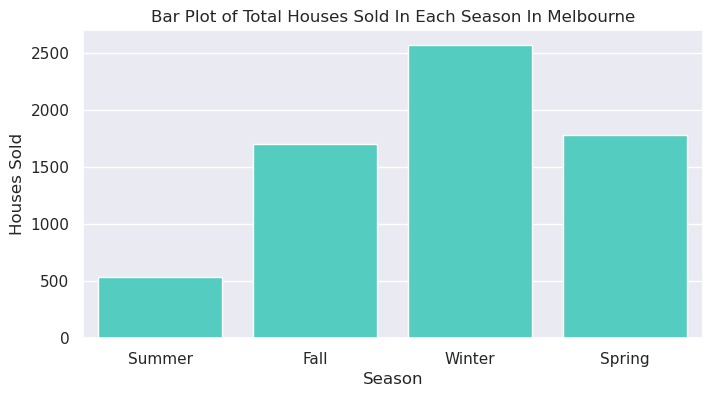

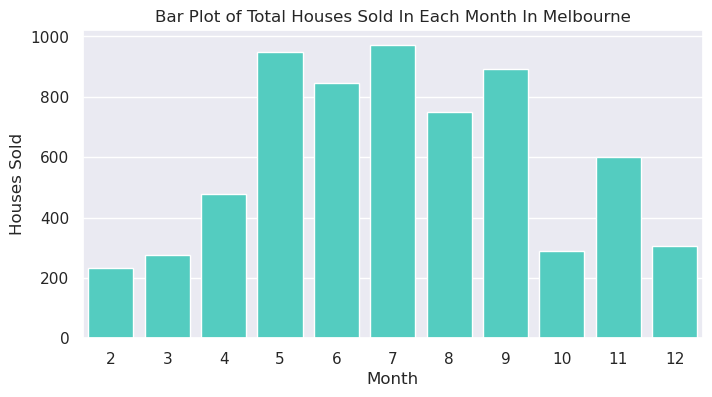

In [30]:
# To examine the above findings further, we investigated when the housing market is not only 
# most and least expensive, but also when it is most and least busy: 

fig = plt.figure()
fig.set_size_inches(8,4)
sns.countplot(x='Season', data=df, color='turquoise')
plt.title('Bar Plot of Total Houses Sold In Each Season In Melbourne')
plt.ylabel('Houses Sold')
plt.show()

fig = plt.figure()
fig.set_size_inches(8,4)
sns.countplot(x='Month', data=df, color='turquoise')
plt.title('Bar Plot of Total Houses Sold In Each Month In Melbourne')
plt.ylabel('Houses Sold')
plt.show()

From the plots above, it is evident that the busiest season for the housing market in Melbourne is Winter, followed by Fall and Spring, and then by Summer. Based on our cleaned data set, we can even see that there were no houses sold in the month of January (mid-Summer), while there were between 700 and 1000 houses sold each month from May through September (months from the end of Fall to the start of Spring).< Furthermore, in the seasonal bar plot, we can see that there is a roughly 500% increase in the number of houses sold in the Winter as compared to the Summer. Together, these two plots display a clear and significant trend in the seasonal nature of these data.

**Conclusions - Q4** <br>
In conclusion, real estate prices in Melbourne appear to follow a roughly seasonal pattern. These prices are highest (on average) in the Spring, followed by the Summer and Fall, and then by Winter. Within months specifically, prices are highest between August and December, and generally lower between February and July. The month of March presented a peculiar outlier to these data, as its average prices are much higher than the months before and after it. 

Like Melbourne's average housing prices, the number of houses sold throughout the year also appears to follow a seasonal pattern. The pattern in these data is considerably more pronounced than the pattern in housing prices: the most houses are sold in the Winter months, far fewer houses are sold in the Fall and Spring months, and far fewer still are sold in the Summer months. Between months, the most houses are sold between May and September (peaking in July), and the fewest houses are sold between October and April (reaching its lowest point in January, when no houses were reported sold in our dataset, followed by February). 

To put these conclusions another way, the best month of the year to purchase a house frugally is in July, when prices are lowest. This is additionally the month when the most houses are sold, so a purchaser also has the most options in this month. The best months of the year to sell a house, on the other hand, are March, October, and December, when prices are highest. These months also tend to see the fewest houses sold, so the options for a purchaser are much lower during these months than in Winter. 

### 5. Linear Regression Model

In [31]:
# Selecting the variables we will use for the Linear Regression Model.
# Based on the heat map, we decided to use the variables that have the highest correlation with Price.
# We checked for overfitting by not including independent variables that were highly correlated with one another.
regression_columns = ['BuildingArea', 'YearBuilt', 'Distance', 'Price']
df_reg = df[regression_columns]

# Price is our dependent variable. We created a new data frame for that variable named 'y'
y = df_reg.iloc[:,-1]
# We created a data frame for our independent variables and called this 'x'
x = df_reg.iloc[:,:-1]

In [32]:
# Splitting the data into training and testing 
from sklearn.model_selection import train_test_split

# Fixing the random assignment for testing and training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [33]:
# Creating the Linear Regression Model
from sklearn.linear_model import LinearRegression # Linear Regression Class

lrm = LinearRegression()
lrm.fit(x_train, y_train)

LinearRegression()

In [34]:
# Predicting using x_test
y_pred = lrm.predict(x_test)

# Comparing y_test and y_pred
y_comparison = pd.DataFrame({'y_pred': np.round(y_pred, 2), 'y_test': np.round(y_test, 2)})
y_comparison['residuals'] = y_comparison['y_test'] - y_comparison['y_pred']
y_comparison.head(10)

,y_pred,y_test,residuals
7182,1121710.84,1250000.0,128289.16
11497,793099.94,755000.0,-38099.94
225,1553519.50,1939000.0,385480.50
4832,1173036.87,1055000.0,-118036.87
820,1057599.37,651000.0,-406599.37
11755,292812.68,445000.0,152187.32
7422,791577.34,575000.0,-216577.34
4043,687792.68,725000.0,37207.32
8652,1568745.82,2250000.0,681254.18
11762,1300138.92,1390000.0,89861.08


In [35]:
# Checking cross validation and the R^2 value of our model
from sklearn.model_selection import cross_val_score # Cross Validation 

cv = cross_val_score(lrm, x_train, y_train, cv=10) # R-squared: proportion of the variance for a DV explained by a IVs in a regression model
cv.mean()

0.5670455479346805

In [36]:
# Printing the coefficients and y-intercept for our model
print(lrm.coef_)
print(lrm.intercept_)

[  5688.28174278  -4872.37649885 -21425.91348173]
10032751.922365043


**Conclusions - Linear Regression** 

The linear regression model that we constructed for housing prices in Melbourne is:

$y = 10032751.92 + 5688.28x_1 - 4872.38x_2 - 21425.91x_3$
- $x_1$: Building Area <br>
- $x_2$: Year Built <br>
- $x_3$: Distance <br>

This means that the y-intercept of the model is 10,032,751.92 AUD, and that this amount is changed by 5,688.28 AUD for every incremental change in a house's building area, - 4,872.38 AUD for every incremental change in the year that a house was built, and −21,425.91 AUD for every incremental change in the distance of a house from Melbourne's CBD. This linear regression model has an R^2 value of about 0.5670, meaning that roughly 56.70% of the variability in housing price is accounted for by our model. 

To illustrate the usage of this model, we could feed fictional values for Building Area, Year Built, and Distance into the model and examine the resulting price. For example, for a house with a building area of 100.0, a year built of 1950, and a distance from Melbourne's CBD of 15.0, our model would predict this house's price to be:

In [37]:
y = 10032751.92 + (5688.28 * 100.0) - (4872.38 * 1950) - (21425.91 * 15.0)
y

779050.2699999999

= 779,050.27 AUD

### General Conclusions

We designed and executed this project, using the knowledge we acquired throughout DATA 601, to investigate housing prices in Melbourne, Australia, and to explore the factors of housing which are most related to real estate prices. 

Before conducting our analytical and visualization procedures, we completed data cleaning and data wrangling procedures in order to properly prepare our dataset to explore our guiding questions. 

From our investigations into our first guiding question, we discovered that the distance of a house from Melbourne's central business district (CBD) is negatively correlated (r = -0.1738) with housing prices. In other words, the further a house is located from the CBD, the lower the price of the house. 

To explore our second guiding question, we created an interactive map to show the most important real estate statistics of each region in Melbourne. Using this visualization, one can gain a better understanding of the housing market across the eight regions of Melbourne.

Exploring our third guiding question, we created a heat map to display the relationship between various features of housing (e.g., the number of rooms, the building area, and the year the house was built) and housing prices. From this, we discovered that the two features which are most strongly correlated with housing prices are the year a house was built and the building area of a house. 

By investigating our fourth guiding question, we discovered that housing prices follow a seasonal pattern, wherein housing prices are highest on average in the Spring and lowest in the winter. In contrast, the most houses are sold in the winter, and the fewest are sold in the summer.

Lastly, we decided to take our analysis of this dataset one step further by creating a multiple linear regression model in order to predict housing prices in Melbourne's real estate market. Our model has an R-squared value of 0.56704, meaning that it can explain roughly 56.7% of the variance in housing prices based on specific values of a house's building area, year built, and distance from Melbourne's CBD. 

Completing this project was both a challenging and rewarding endeavour. We overcame numerous obstacles en route to concluding this report, and this presented a terrific opportunity to showcase the skills and knowledge that we developed in DATA 601. 

### References

Australian Council of Social Service. (n.d.). Components of Australia’s wealth: Data and Figures. Poverty and Inequality in Australia. Retrieved September 16, 2022 from https://povertyandinequality.acoss.org.au/inequality/components-of-australias-wealth/

Department of Industry, S. (n.d.). VIC State Electoral Boundaries - Geoscape Administrative Boundaries. data.gov.au. [online] Available at: https://data.gov.au/data/dataset/vic-state-electoral-boundaries-geoscape-administrative-boundaries [Accessed 10 Oct. 2022].

Dietz, R. D., & Haurin, D. R. (2003). The social and private micro-level consequences of homeownership. Journal of Urban Economics, 54(3), 401–450. https://doi.org/10.1016/S0094-1190(03)00080-9

Gaolu, Z. (2015). The Effect of Central Business District on House Prices in Chengdu Metropolitan Area: A Hedonic Approach. [online] www.atlantis-press.com. doi:10.2991/cas-15.2015.83.

Teye, A.L., de Haan, J. and Elsinga, M.G. (2017). Risks and interrelationships of subdistrict house prices: the case of Amsterdam. Journal of Housing and the Built Environment, 33(2), pp.209–226. doi:10.1007/s10901-017-9568-z.

vverde.github.io. (n.d.). Interactive choropleth with Python and Folium (and some tips). [online] Available at: https://vverde.github.io/blob/interactivechoropleth.html [Accessed 10 Oct. 2022].

#### Dataset
www.kaggle.com. (n.d.). Melbourne Housing Snapshot. [online] Available at: https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot [Accessed 10 Sep. 2022].